In [1]:
# pip install ydata_profiling

In [2]:
# pip install scikit-learn

In [3]:
# pip install Boruta

In [4]:
# pip install BorutaShap

In [5]:
# pip install ipywidgets

In [6]:
# pip install fitter

In [7]:
# pip install matplotlib==3.7.3

In [3]:
# Libraries Install
from fitter import Fitter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import scipy.stats as stats
import requests
from ydata_profiling import ProfileReport

In [4]:
# Data Cleaning
# url ='https://www.pro-football-reference.com/teams/phi/2022.htm'
# df = pd.read_html(url)[1]
# df.insert(0, 'Year', '2022')

# url = 'https://www.pro-football-reference.com/teams/phi/2021.htm'
# df1 = pd.read_html(url)[1]
# df1.insert(0, 'Year', '2021')

# url = 'https://www.pro-football-reference.com/teams/phi/2020.htm'
# df2 = pd.read_html(url)[1]
# df2.insert(0, 'Year', '2020')

# url = 'https://www.pro-football-reference.com/teams/phi/2019.htm'
# df3 = pd.read_html(url)[1]
# df3.insert(0, 'Year', '2019')

# url = 'https://www.pro-football-reference.com/teams/phi/2018.htm'
# df4 = pd.read_html(url)[1]
# df4.insert(0, 'Year', '2018')

# url = 'https://www.pro-football-reference.com/teams/phi/2017.htm'
# df5 = pd.read_html(url)[1]
# df5.insert(0, 'Year', '2017')

# url = 'https://www.pro-football-reference.com/teams/phi/2016.htm'
# df6 = pd.read_html(url)[1]
# df6.insert(0, 'Year', '2016')

# url = 'https://www.pro-football-reference.com/teams/phi/2015.htm'
# df7 = pd.read_html(url)[1]
# df7.insert(0, 'Year', '2015')

# url = 'https://www.pro-football-reference.com/teams/phi/2014.htm'
# df8 = pd.read_html(url)[1]
# df8.insert(0, 'Year', '2014')

# url = 'https://www.pro-football-reference.com/teams/phi/2013.htm'
# df9 = pd.read_html(url)[1]
# df9.insert(0, 'Year', '2013')

# dfs = [df,df1, df2, df3, df4, df5, df6, df7, df8, df9]

# combined_df = pd.concat(dfs, ignore_index=True)

In [5]:
# df_cleaned = combined_df.dropna(axis=0, thresh=20)
# df_cleaned['Offense']=df_cleaned['Offense'].fillna(0)
# df_cleaned['Defense']=df_cleaned['Defense'].fillna(0)
# df_cleaned['Win']=np.where(df_cleaned['Unnamed: 5_level_0']=='W',1,0)
# df_cleaned['Unnamed: 8_level_0']=df_cleaned['Unnamed: 8_level_0'].fillna(0)
# df_cleaned['Home_Games']=np.where(df_cleaned['Unnamed: 8_level_0']=='@',1,0)
# df_cleaned=df_cleaned.drop(columns=['Unnamed: 8_level_0', 'Unnamed: 6_level_0'], axis=1)

In [6]:
# df_cleaned.to_csv('Eagles_Data_Final.csv')
# Some header cleaning such that ther are no subheaders

# eagles=pd.read_csv("/Users/omerabdelrahim/Downloads/Eagles_Data_Final.csv", sep=";")
# eagles['MOV']=eagles['TmScore']-eagles['OppScore']
# eagles['MOT']=eagles['DTO']-eagles['OTO']
# eagles=eagles.drop(['Rec'], axis=1)
# eagles.to_csv('Eagles_10yr.csv')

We will be analyzing the variables MOV, MOT, EOffense, EDefense, ESpTms, DRushY, and ORushY

(a) Begin by providing a descriptive analysis of your variables (include all predictors and response variable). This should include things like histograms, quantile plots, correlation plots, etc.

# 1. Descriptive Analysis: Perform a univariate analysis following the steps below.

MOV= Margin of Victory

MOT = Margin of Turnover

O1stD = First Downs Gained

D1stD = First Downs Allowed

DRushY = Rush Yards Allowed

ORushY = Rush Yards Gained

Home_Games = Indicator Variable for whether the game was played at home

EOffense = Expected Offensive Points

EDefense = Expected Defensive Points

ESpTms = Expected Specials Teams Points


In [7]:
#from google.colab import files
#upload = files.upload()

In [8]:
eagles=pd.read_csv('Eagles_10yr (1).csv')
eagles.describe()

Unnamed: 0  Observations         Year     TmScore    OppScore  \
count  173.000000    173.000000   173.000000  173.000000  173.000000   
mean    86.000000     86.000000  2017.624277   25.433526   22.531792   
std     50.084928     50.084928     2.900058    9.385319   10.502789   
min      0.000000      0.000000  2013.000000    0.000000    0.000000   
25%     43.000000     43.000000  2015.000000   20.000000   16.000000   
50%     86.000000     86.000000  2018.000000   24.000000   22.000000   
75%    129.000000    129.000000  2020.000000   32.000000   27.000000   
max    172.000000    172.000000  2022.000000   54.000000   53.000000   

            O1stD      OTotYd      OPassY      ORushY         OTO       D1stD  \
count  173.000000  173.000000  173.000000  173.000000  173.000000  173.000000   
mean    21.566474  368.005780  239.242775  128.763006    1.427746   20.144509   
std      4.403015   82.135983   75.380423   58.052567    1.249062    5.293363   
min      9.000000  139.000000   82.000000    7.000000    0.000000    8.000000   
25%     19.000000  313.000000  179.000000   94.000000    0.000000   16.000000   
50%     22.000000  373.000000  232.000000  118.000000    1.000000   20.000000   
75%     25.000000  428.000000  298.000000  156.000000    2.000000   24.000000   
max     34.000000  542.000000  462.000000  363.000000    5.000000   35.000000   

           DTotYd      DPassY      DRushY         DTO         Win  Home_Games  \
count  173.000000  173.000000  173.000000  173.000000  173.000000  173.000000   
mean   350.965318  243.445087  107.520231    1.456647    0.566474    0.485549   
std     93.325630   82.640041   46.532758    1.183523    0.497000    0.501242   
min     89.000000   61.000000    6.000000    0.000000    0.000000    0.000000   
25%    287.000000  182.000000   74.000000    1.000000    0.000000    0.000000   
50%    349.000000  239.000000  101.000000    1.000000    1.000000    0.000000   
75%    412.000000  297.000000  134.000000    2.000000    1.000000    1.000000   
max    613.000000  500.000000  283.000000    5.000000    1.000000    1.000000   

              MOV         MOT  
count  173.000000  173.000000  
mean     2.901734    0.028902  
std     14.700366    1.789594  
min    -41.000000   -5.000000  
25%     -6.000000   -1.000000  
50%      3.000000    0.000000  
75%     11.000000    1.000000  
max     43.000000    5.000000

In [9]:
# Replace the commas in the data with periods
eagles['EOffense'] = eagles.EOffense.str.replace(',', '.')
eagles['EDefense'] = eagles.EDefense.str.replace(',', '.')
eagles['ESpTms'] = eagles.ESpTms.str.replace(',', '.')


In [10]:
# Convert the objects to floats
eagles['EOffense'] = eagles.EOffense.astype(float)
eagles['EDefense'] = eagles.EDefense.astype(float)
eagles['ESpTms'] = eagles.ESpTms.astype(float)


In [18]:
eagles

Unnamed: 0  Observations  Year       Week  Day    Date       Time  \
0             0             0  2022          1  Sun  11-Sep  1:00PM ET   
1             1             1  2022          2  Mon  19-Sep  8:30PM ET   
2             2             2  2022          3  Sun  25-Sep  1:00PM ET   
3             3             3  2022          4  Sun   2-Oct  1:00PM ET   
4             4             4  2022          5  Sun   9-Oct  4:25PM ET   
..          ...           ...   ...        ...  ...     ...        ...   
168         168           168  2013         14  Sun   8-Dec  1:02PM ET   
169         169           169  2013         15  Sun  15-Dec  1:02PM ET   
170         170           170  2013         16  Sun  22-Dec  8:30PM ET   
171         171           171  2013         17  Sun  29-Dec  8:30PM ET   
172         172           172  2013  Wild Card  Sat   4-Jan  8:14PM ET   

       Source WL                    Opp  ...  DPassY  DRushY  DTO  EOffense  \
0    boxscore  W          Detroit Lions  ...     205     181    1     21.15   
1    boxscore  W      Minnesota Vikings  ...     202      62    3     14.26   
2    boxscore  W  Washington Commanders  ...     153      87    1      9.65   
3    boxscore  W   Jacksonville Jaguars  ...     148      71    5     -0.18   
4    boxscore  W      Arizona Cardinals  ...     239     124    1     10.63   
..        ... ..                    ...  ...     ...     ...  ...       ...   
168  boxscore  W          Detroit Lions  ...     151      80    3     12.74   
169  boxscore  L      Minnesota Vikings  ...     370      85    1     11.84   
170  boxscore  W          Chicago Bears  ...     196      61    2     29.46   
171  boxscore  W         Dallas Cowboys  ...     358      56    3      2.05   
172  boxscore  L     New Orleans Saints  ...     249     185    2      7.51   

     EDefense  ESpTms  Win  Home_Games  MOV  MOT  
0      -15.67   -0.78    1           1    3    1  
1        7.86   -7.37    1           0   17    2  
2       18.29   -8.92    1           1   16    1  
3       11.06   -1.97    1           0    8    4  
4      -12.33    5.16    1           1    3    1  
..        ...     ...  ...         ...  ...  ...  
168     20.73  -13.93    1           0   14    2  
169    -25.24   -2.01    0           1  -18    0  
170      9.95    3.03    1           0   43    1  
171      1.63    0.14    1           1    2    2  
172     -6.97   -2.54    0           0   -2    2  

[173 rows x 29 columns]

In [20]:
eagles['WL'].value_counts()

WL
W    98
L    74
T     1
Name: count, dtype: int64

In [17]:
print(eagles.columns)

Index(['Unnamed: 0', 'Observations', 'Year', 'Week', 'Day', 'Date', 'Time',
       'Source', 'WL', 'Opp', 'TmScore', 'OppScore', 'O1stD', 'OTotYd',
       'OPassY', 'ORushY', 'OTO', 'D1stD', 'DTotYd', 'DPassY', 'DRushY', 'DTO',
       'EOffense', 'EDefense', 'ESpTms', 'Win', 'Home_Games', 'MOV', 'MOT'],
      dtype='object')


In [18]:
print(type(eagles))

<class 'pandas.core.frame.DataFrame'>


In [19]:
eagles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    173 non-null    int64  
 1   Observations  173 non-null    int64  
 2   Year          173 non-null    int64  
 3   Week          173 non-null    object 
 4   Day           173 non-null    object 
 5   Date          173 non-null    object 
 6   Time          173 non-null    object 
 7   Source        173 non-null    object 
 8   WL            173 non-null    object 
 9   Opp           173 non-null    object 
 10  TmScore       173 non-null    int64  
 11  OppScore      173 non-null    int64  
 12  O1stD         173 non-null    int64  
 13  OTotYd        173 non-null    int64  
 14  OPassY        173 non-null    int64  
 15  ORushY        173 non-null    int64  
 16  OTO           173 non-null    int64  
 17  D1stD         173 non-null    int64  
 18  DTotYd        173 non-null    

In [20]:
# Count the number of null values
eagles.isnull().sum()

Unnamed: 0      0
Observations    0
Year            0
Week            0
Day             0
Date            0
Time            0
Source          0
WL              0
Opp             0
TmScore         0
OppScore        0
O1stD           0
OTotYd          0
OPassY          0
ORushY          0
OTO             0
D1stD           0
DTotYd          0
DPassY          0
DRushY          0
DTO             0
EOffense        0
EDefense        0
ESpTms          0
Win             0
Home_Games      0
MOV             0
MOT             0
dtype: int64

In [21]:
print(eagles.Win)

0      1
1      1
2      1
3      1
4      1
      ..
168    1
169    0
170    1
171    1
172    0
Name: Win, Length: 173, dtype: int64


In [22]:
# Initial test of variables in the linear model
model1 = smf.ols(formula='MOV~MOT+DRushY+ORushY+O1stD+D1stD+Home_Games', data=eagles)
model1_results=model1.fit(cov_type='HC1')
print(model1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    MOV   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     31.81
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           2.70e-25
Time:                        13:22:56   Log-Likelihood:                -630.78
No. Observations:                 173   AIC:                             1276.
Df Residuals:                     166   BIC:                             1298.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0746      5.195      2.902      0.0

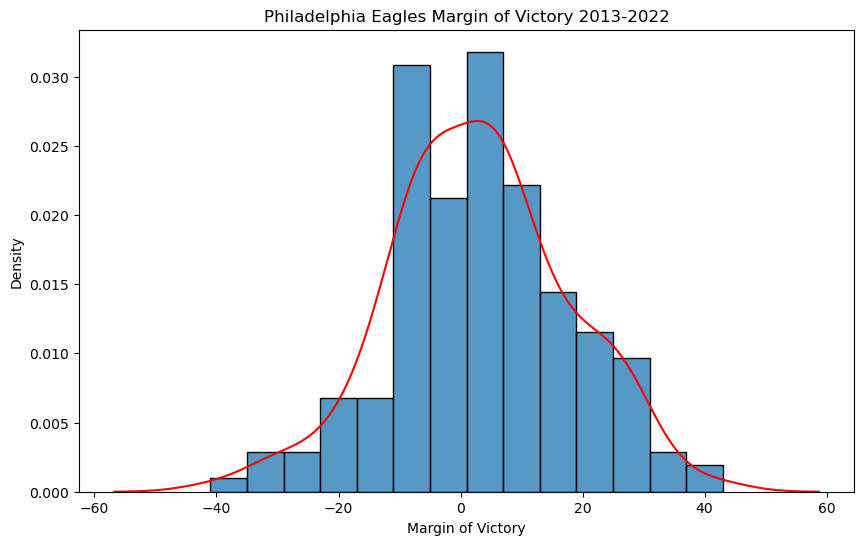

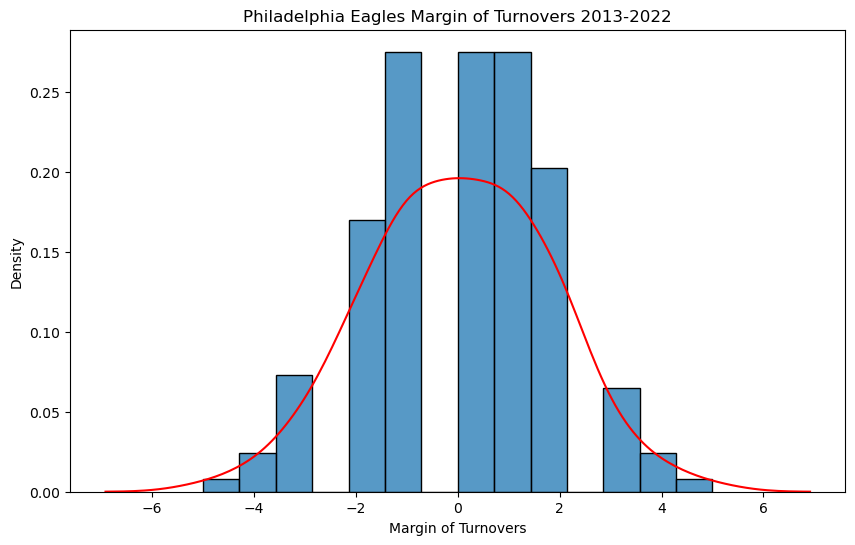

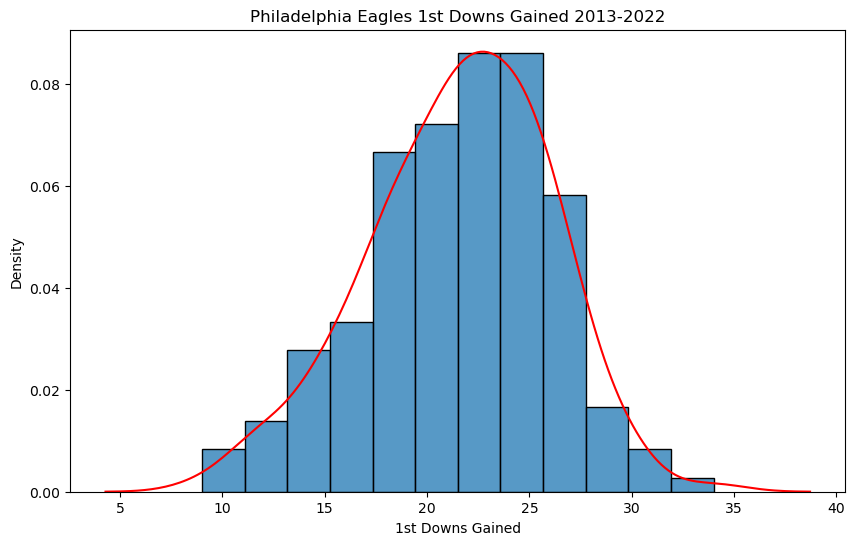

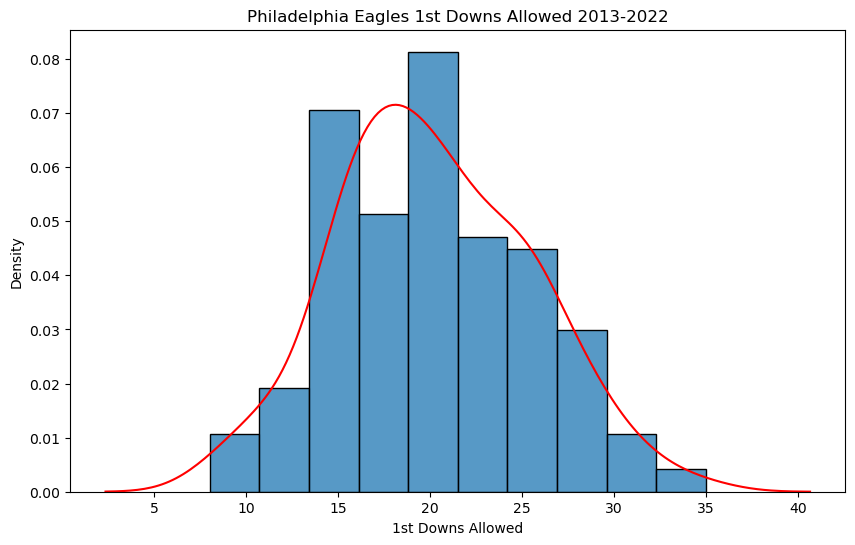

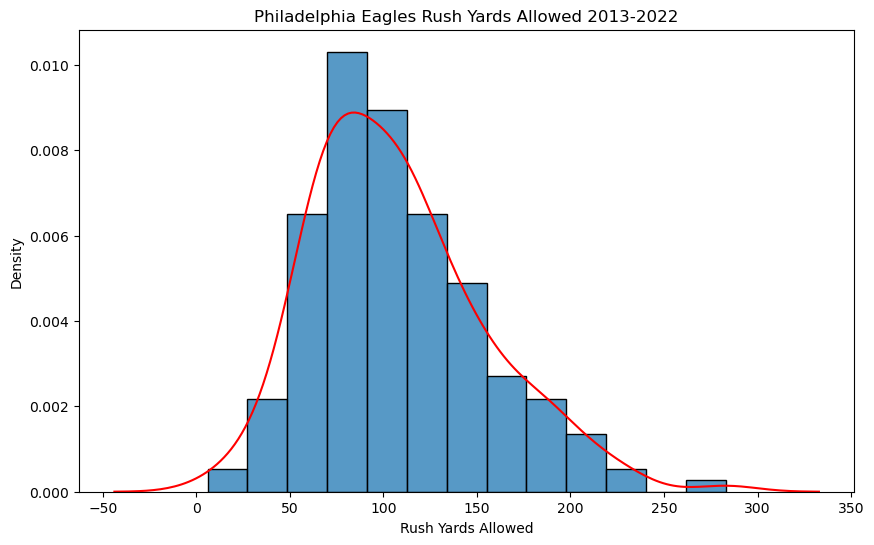

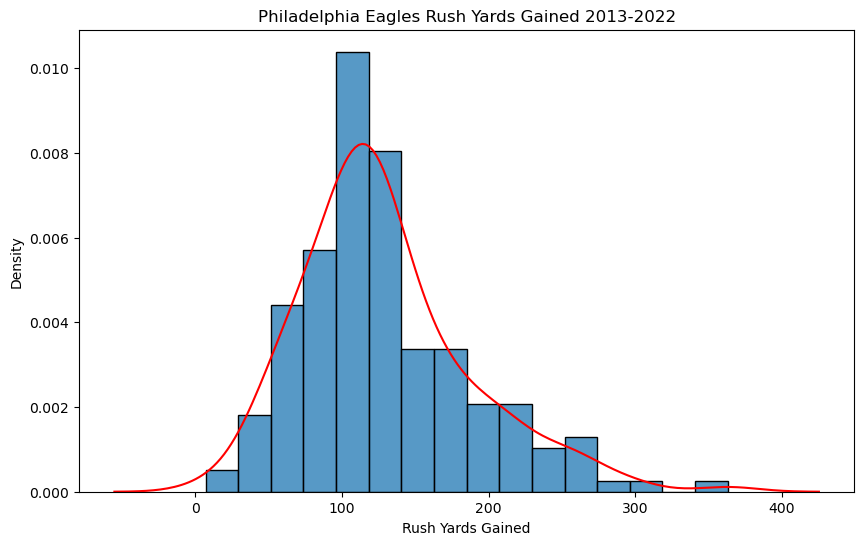

In [23]:
# histogram and density

plt.figure(figsize = (10,6))
sns.histplot(eagles.MOV, stat = "density")
sns.kdeplot(eagles.MOV, color = "red")
plt.title("Philadelphia Eagles Margin of Victory 2013-2022")
plt.xlabel("Margin of Victory")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(eagles.MOT, stat = "density")
sns.kdeplot(eagles.MOT, color = "red")
plt.title("Philadelphia Eagles Margin of Turnovers 2013-2022")
plt.xlabel("Margin of Turnovers")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(eagles.O1stD, stat = "density")
sns.kdeplot(eagles.O1stD, color = "red")
plt.title("Philadelphia Eagles 1st Downs Gained 2013-2022")
plt.xlabel("1st Downs Gained")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(eagles.D1stD, stat = "density")
sns.kdeplot(eagles.D1stD, color = "red")
plt.title("Philadelphia Eagles 1st Downs Allowed 2013-2022")
plt.xlabel("1st Downs Allowed")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(eagles.DRushY, stat = "density")
sns.kdeplot(eagles.DRushY, color = "red")
plt.title("Philadelphia Eagles Rush Yards Allowed 2013-2022")
plt.xlabel("Rush Yards Allowed")
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(eagles.ORushY, stat = "density")
sns.kdeplot(eagles.ORushY, color = "red")
plt.title("Philadelphia Eagles Rush Yards Gained 2013-2022")
plt.xlabel("Rush Yards Gained")
plt.show()


(array([ 1.,  3.,  3.,  7.,  7., 32., 22., 33., 23., 15., 12., 10.,  3.,
         2.]),
 array([-41., -35., -29., -23., -17., -11.,  -5.,   1.,   7.,  13.,  19.,
         25.,  31.,  37.,  43.]),
 <BarContainer object of 14 artists>)

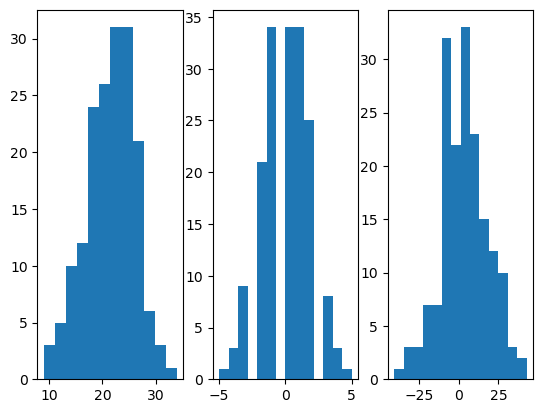

In [24]:
plt.subplot(1,3,1)
plt.hist(eagles.O1stD, bins='fd')
plt.subplot(1,3,2)
plt.hist(eagles.MOT, bins='fd')
plt.subplot(1,3,3)
plt.hist(eagles.MOV, bins='fd')

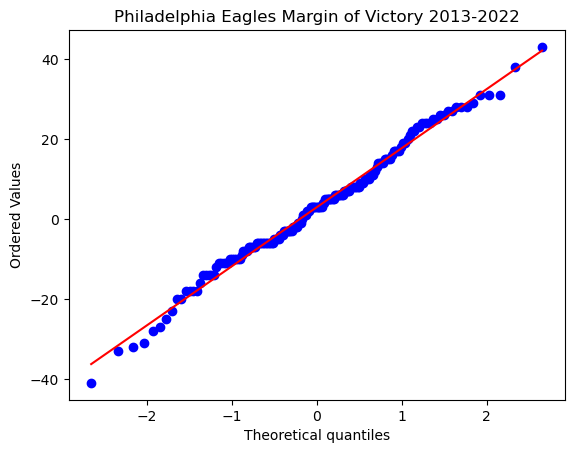

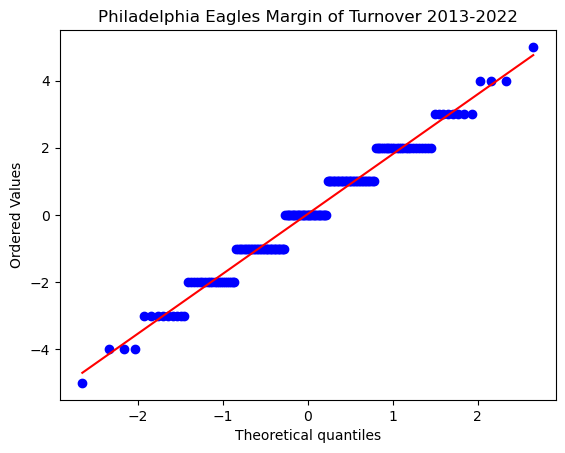

In [25]:
# q-q Plot

stats.probplot(eagles.MOV, dist="norm", plot=plt)
plt.title("Philadelphia Eagles Margin of Victory 2013-2022")
plt.show()

stats.probplot(eagles.MOT, dist="norm", plot=plt)
plt.title("Philadelphia Eagles Margin of Turnover 2013-2022")
plt.show()

In [26]:
# Var
#model2 = smf.ols(formula='MOV~MOT', data=eagles)
#model2_results=model1.fit(cov_type='HC1')
#print(model2_results.summary())

<Axes: >

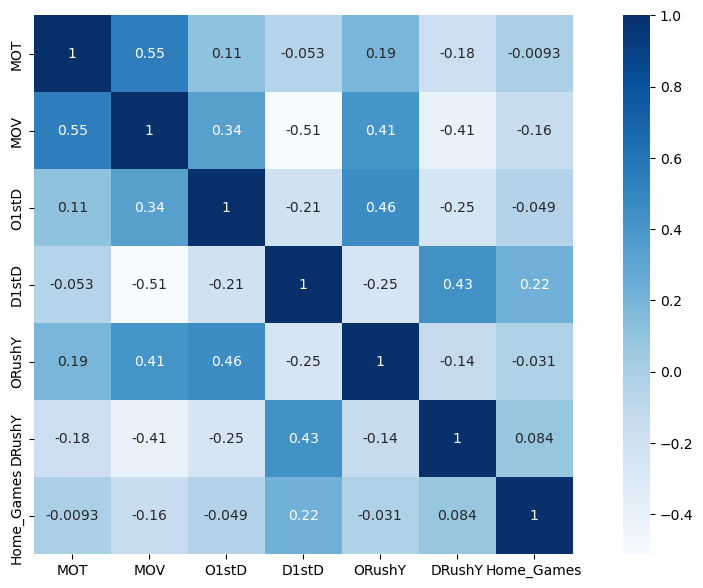

In [27]:
# Correlation Plot
r_vars=eagles[['MOT','MOV','O1stD','D1stD','ORushY','DRushY','Home_Games']]

plt.figure(figsize=(13,7))
data=r_vars
c= data.corr()
sns.heatmap(c,cmap="Blues",annot=True,square = True)

In [ ]:
# Pair Plot
# specify the column to include or exclude
sns.pairplot(r_vars, kind='reg', hue = 'Win') # Unable to get hue working

(b) Discuss your findings from doing an exploratory analysis using Pandas Profiling. Did you discover anything new?

In [29]:
ProfileReport(r_vars)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

(c) Estimate density distributions (e.g., Cullen & Frey) for all your variables, and show the plots with the respective fits.

(array([ 1.,  3.,  3.,  7.,  7., 32., 22., 33., 23., 15., 12., 10.,  3.,
         2.]),
 array([-41., -35., -29., -23., -17., -11.,  -5.,   1.,   7.,  13.,  19.,
         25.,  31.,  37.,  43.]),
 <BarContainer object of 14 artists>)

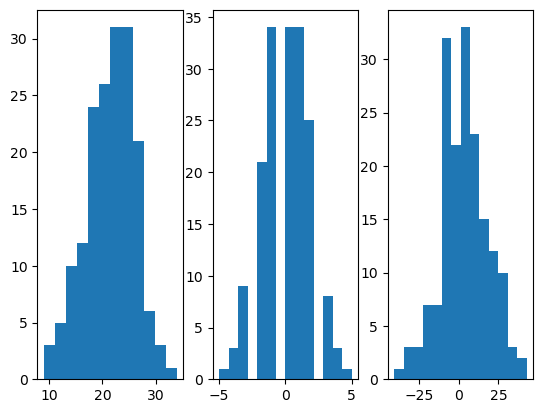

In [30]:
plt.subplot(1,3,1)
plt.hist(eagles.O1stD, bins='fd')
plt.subplot(1,3,2)
plt.hist(eagles.MOT, bins='fd')
plt.subplot(1,3,3)
plt.hist(eagles.MOV, bins='fd')

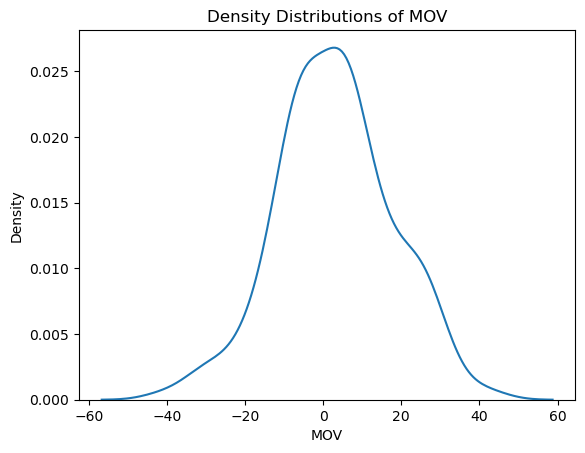

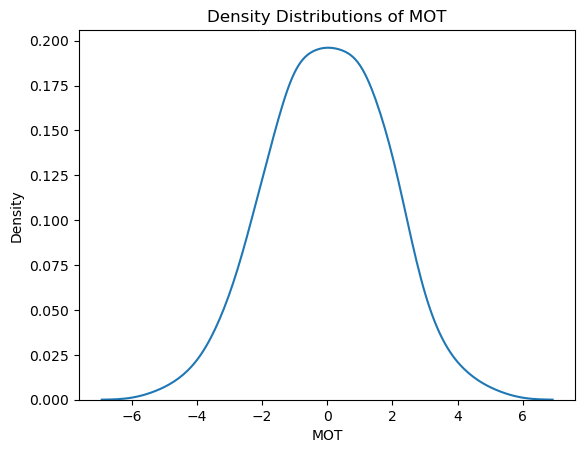

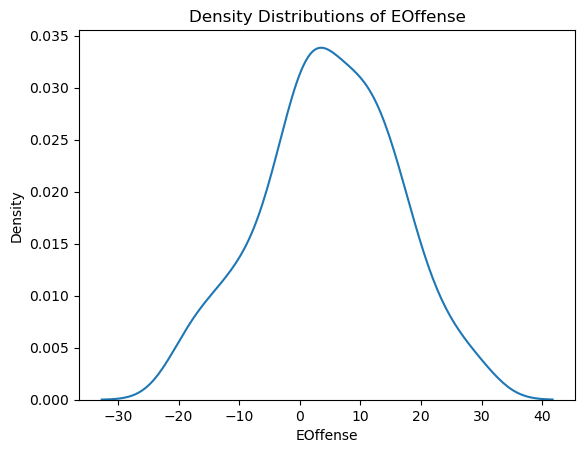

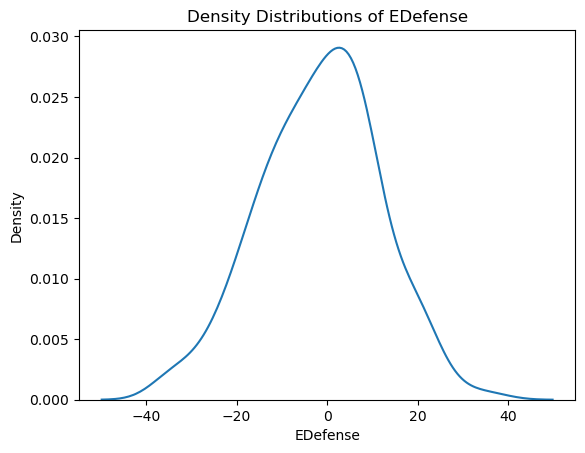

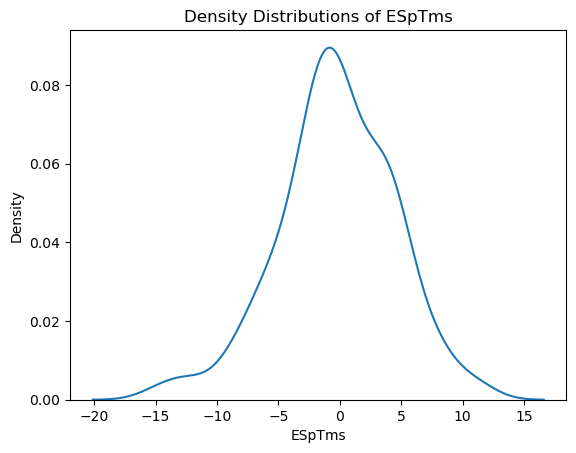

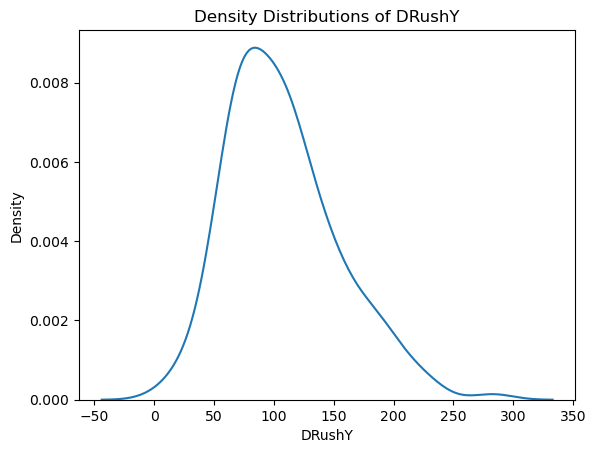

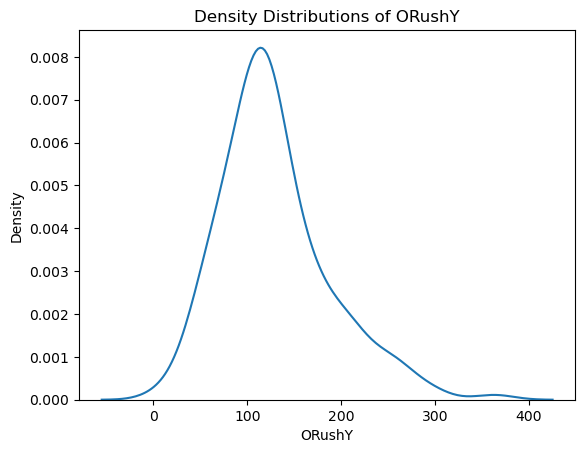

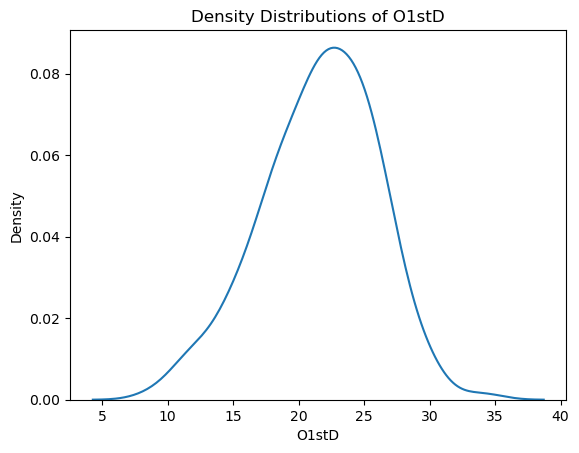

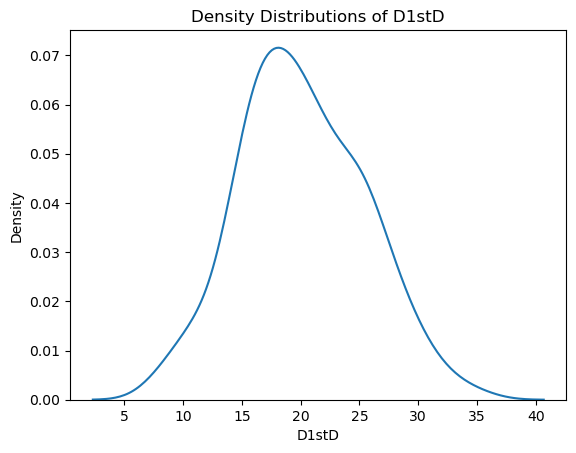

In [74]:
# We will be using MOV, MOT, EOffense, EDefense, ESpTms, DRushY,ORushY, O1stD, D1stD
d_MOV = sns.kdeplot(eagles.MOV)
plt.title('Density Distributions of MOV')
plt.show()

d_MOT = sns.kdeplot(eagles.MOT)
plt.title('Density Distributions of MOT')
plt.show()

d_EOffense = sns.kdeplot(eagles.EOffense)
plt.title('Density Distributions of EOffense')
plt.show()

d_EDefense = sns.kdeplot(eagles.EDefense)
plt.title('Density Distributions of EDefense')
plt.show()

d_ESpTms = sns.kdeplot(eagles.ESpTms)
plt.title('Density Distributions of ESpTms')
plt.show()

d_DRushY = sns.kdeplot(eagles.DRushY)
plt.title('Density Distributions of DRushY')
plt.show()

d_ORushY = sns.kdeplot(eagles.ORushY)
plt.title('Density Distributions of ORushY')
plt.show()

d_O1stD = sns.kdeplot(eagles.O1stD)
plt.title('Density Distributions of O1stD')
plt.show()

d_D1stD = sns.kdeplot(eagles.D1stD)
plt.title('Density Distributions of D1stD')
plt.show()

In [112]:
import plotly.offline as pyo
import plotly.figure_factory as ff
import numpy as np

group_labels = ['MOV', 'MOT', 'EOffense', 'EDefense', 'ESpTms', 'DRushY', 'ORushY', 'O1stD', 'D1stD']

MOV_series = eagles["MOV"].tolist()
MOT_series = eagles['MOT'].tolist()
EOffense_series = eagles['EOffense'].tolist()
EDefense_series = eagles['EDefense'].tolist()
ESpTms_series = eagles['ESpTms'].tolist()
DRushY_series = eagles['DRushY'].tolist()
ORushY_series = eagles['ORushY'].tolist()
O1stD_series = eagles['O1stD'].tolist()
D1stD_series = eagles['D1stD'].tolist()

hist_data = [MOV_series, MOT_series, EOffense_series, EDefense_series, ESpTms_series, DRushY_series, ORushY_series, O1stD_series, D1stD_series]

# Calculate bin size using the Freedman-Diaconis formula
bin_sizes = [2 * (np.percentile(data, 75) - np.percentile(data, 25)) / (len(data) ** (1/3)) for data in hist_data]

fig = ff.create_distplot(hist_data, group_labels, bin_size=bin_sizes)

fig.update_layout(title_text='Combined Histogram and Density Distributions of Variables', height=1000, width=900)
pyo.iplot(fig)

In [87]:
import plotly.offline as pyo
import plotly.subplots as sp
import plotly.figure_factory as ff
import numpy as np

group_labels = ['MOV', 'MOT', 'Offense', 'EDefense', 'ESpTms', 'DRushY', 'ORushY', 'O1stD', 'D1stD']

MOV_series = eagles["MOV"].tolist()
MOT_series = eagles['MOT'].tolist()
EOffense_series = eagles['EOffense'].tolist()
EDefense_series = eagles['EDefense'].tolist()
ESpTms_series = eagles['ESpTms'].tolist()
DRushY_series = eagles['DRushY'].tolist()
ORushY_series = eagles['ORushY'].tolist()
O1stD_series = eagles['O1stD'].tolist()
D1stD_series = eagles['D1stD'].tolist()

hist_data = [MOV_series, MOT_series, EOffense_series, EDefense_series\
             , ESpTms_series, DRushY_series, ORushY_series, O1stD_series, D1stD_series]

# creating a 3x3 subplot
fig = sp.make_subplots(rows=3, cols=3, subplot_titles=group_labels)
row = 1
col = 1

for i, data in enumerate(hist_data):
    # Freedman-Diaconis bin size
    q75, q25 = np.percentile(data, [75, 25])
    iqr = q75 - q25
    bin_size = 2 * iqr / (len(data) ** (1/3))

    # addign histograms
    trace_hist = ff.create_distplot([data], [group_labels[i]], bin_size=bin_size, show_hist=True\
                                    , show_rug=False, colors=['blue'])
    fig.add_trace(trace_hist['data'][0], row=row, col=col)
    
    # adding density distributions
    density = ff.create_distplot([data], [group_labels[i]], show_hist=False, show_rug=False, colors=['red'])
    for trace in density['data']:
        fig.add_trace(trace, row=row, col=col)
    
    # removing the legend
    fig.update_traces(showlegend=False)
    
    col += 1
    if col > 3:
        col = 1
        row += 1


fig.update_layout(title_text='Combined Histogram and Density Distributions of Variables'\
                  , title_x=0.5, height=1000, width=900)
pyo.iplot(fig)

In [33]:
salary_list = eagles["MOV"].tolist()
salary_list = eagles['MOT'].tolist()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integ

sumsquare_error          aic          bic  kl_div  ks_statistic  \
dweibull            0.016563  1002.625252  1012.085127     inf      0.065805   
genlogistic         0.016883  1003.542444  1013.002318     inf      0.050656   
mielke              0.016904  1000.848890  1013.462057     inf      0.050348   
gengamma            0.016909  1049.243331  1061.856497     inf      0.064808   
burr                0.016924  1001.798222  1014.411388     inf      0.050933   

             ks_pvalue  
dweibull      0.423897  
genlogistic   0.746749  
mielke        0.753335  
gengamma      0.443118  
burr          0.740804

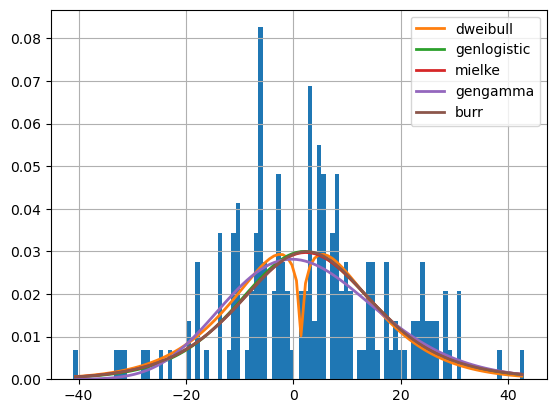

In [32]:
from fitter import Fitter
f = Fitter(eagles.MOV)
f.fit()
f.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED vonmises_fisher distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)
C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: Integratio

sumsquare_error         aic         bic  kl_div  ks_statistic  \
dgamma             13.796826  633.603003  643.062878     inf      0.245257   
dweibull           13.971118  573.850875  583.310750     inf      0.175129   
gennorm            14.141304  569.479033  578.938908     inf      0.110779   
weibull_min        14.141599  566.108074  575.567949     inf      0.107337   
gengamma           14.142542  568.959919  581.573085     inf      0.111033   

                ks_pvalue  
dgamma       1.194577e-09  
dweibull     4.123580e-05  
gennorm      2.643214e-02  
weibull_min  3.438646e-02  
gengamma     2.591388e-02

C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


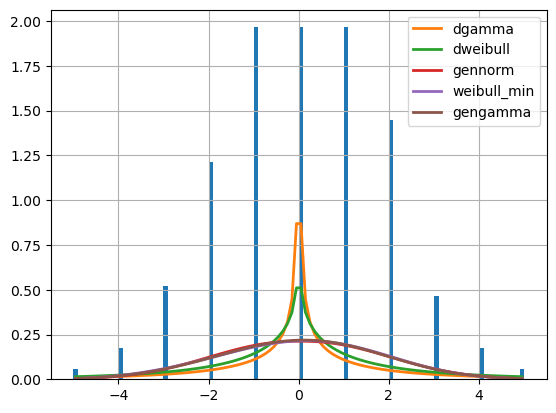

In [33]:
f = Fitter(eagles.MOT)
f.fit()
f.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED vonmises_fisher distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)
SKIPPED triang distribution (taking more than 30 seconds)
C:\Users\12282\anaconda3\Li

sumsquare_error         aic         bic  kl_div  ks_statistic  \
burr12                0.017307  846.461690  859.074856     inf      0.033253   
genhyperbolic         0.017336  848.417290  864.183748     inf      0.026649   
skewnorm              0.017338  844.712977  854.172851     inf      0.027018   
pearson3              0.017338  844.221344  853.681218     inf      0.026350   
powernorm             0.017341  844.674398  854.134273     inf      0.027154   

               ks_pvalue  
burr12          0.987656  
genhyperbolic   0.999432  
skewnorm        0.999281  
pearson3        0.999533  
powernorm       0.999218

C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


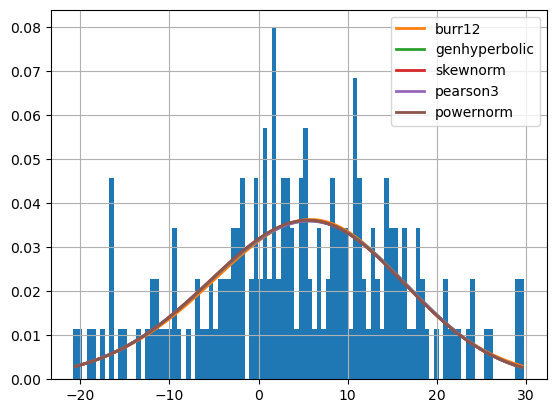

In [34]:
f = Fitter(eagles.EOffense)
f.fit()
f.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED genpareto distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED studentized_range distribu

sumsquare_error         aic         bic  kl_div  ks_statistic  \
burr12                0.009213  954.313035  966.926202     inf      0.036434   
skewnorm              0.009227  955.699446  965.159321     inf      0.034841   
genhyperbolic         0.009230  959.717410  975.483868     inf      0.035541   
powernorm             0.009233  955.390752  964.850626     inf      0.034770   
norminvgauss          0.009239  957.311268  969.924435     inf      0.035453   

               ks_pvalue  
burr12          0.969344  
skewnorm        0.979919  
genhyperbolic   0.975640  
powernorm       0.980322  
norminvgauss    0.976210

C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


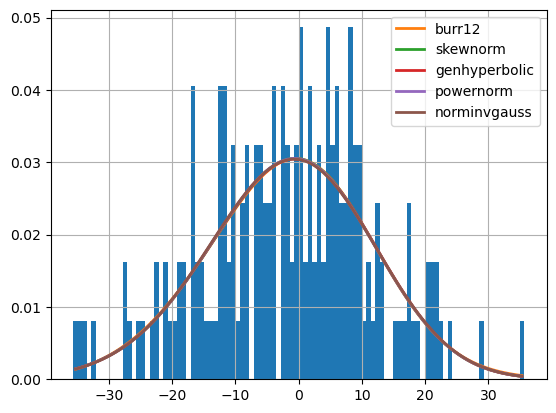

In [35]:
f = Fitter(eagles.EDefense)
f.fit()
f.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED genpareto distribution (taking more than 30 seconds)
SKIPPED johnsonsb distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED lognorm distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED powerlognorm distribution (

sumsquare_error         aic         bic  kl_div  ks_statistic  \
gennorm             0.079485  773.141991  782.601866     inf      0.051626   
logistic            0.080359  774.586283  780.892866     inf      0.044246   
tukeylambda         0.080565  776.274220  785.734095     inf      0.046655   
hypsecant           0.080598  772.908962  779.215545     inf      0.054634   
genlogistic         0.081329  771.847136  781.307011     inf      0.045327   

             ks_pvalue  
gennorm       0.725811  
logistic      0.872087  
tukeylambda   0.828463  
hypsecant     0.659486  
genlogistic   0.853155

C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


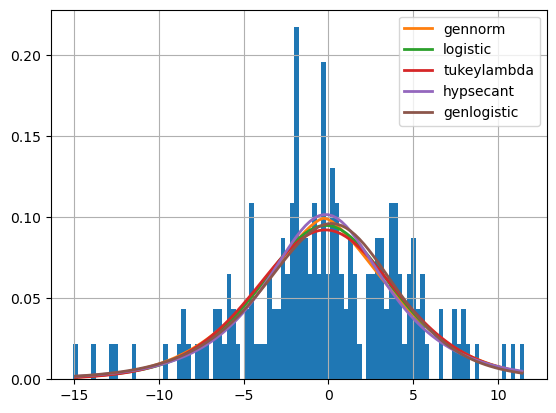

In [36]:
f = Fitter(eagles.ESpTms)
f.fit()
f.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED gausshyper distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED genhyperbolic distribution (taking more than 30 seconds)
SKIPPED genpareto distribution (taking more than 30 seconds)
SKIPPED gompertz distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED johnsonsb distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED kstwobign distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking 

sumsquare_error          aic          bic  kl_div  ks_statistic  \
invweibull           0.000616  1262.841627  1272.301501     inf      0.032937   
gumbel_r             0.000616  1260.772437  1267.079021     inf      0.032960   
skewnorm             0.000617  1274.563632  1284.023506     inf      0.034656   
norminvgauss         0.000621  1271.314025  1283.927192     inf      0.038743   
johnsonsu            0.000623  1271.977087  1284.590254     inf      0.039729   

              ks_pvalue  
invweibull     0.988895  
gumbel_r       0.988809  
skewnorm       0.980961  
norminvgauss   0.948471  
johnsonsu      0.937493

C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


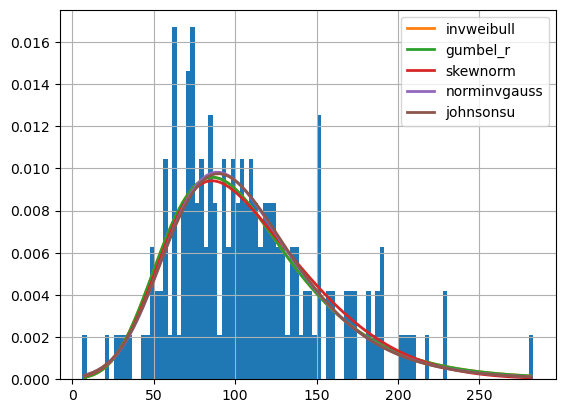

In [37]:
f = Fitter(eagles.DRushY)
f.fit()
f.summary()


SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED gausshyper distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED geninvgauss distribution (taking more than 30 seconds)
SKIPPED genpareto distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED johnsonsb distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more t

sumsquare_error          aic          bic  kl_div  ks_statistic  \
loglaplace         0.000275  1332.779068  1342.238943     inf      0.034855   
dgamma             0.000285  1369.938881  1379.398755     inf      0.066331   
dweibull           0.000289  1375.764973  1385.224847     inf      0.071209   
laplace            0.000290  1371.085432  1377.392016     inf      0.063825   
gennorm            0.000292  1375.263816  1384.723691     inf      0.062297   

            ks_pvalue  
loglaplace   0.979839  
dgamma       0.413965  
dweibull     0.328583  
laplace      0.462500  
gennorm      0.493461

C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents

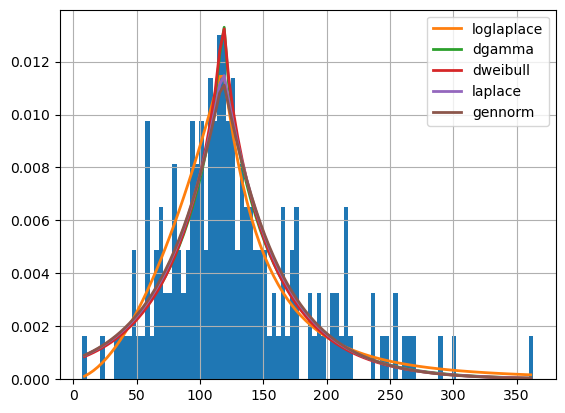

In [38]:
f = Fitter(eagles.ORushY)
f.fit()
f.summary()

C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED burr dist

sumsquare_error         aic         bic  kl_div  ks_statistic  \
skewnorm              0.827303  768.117380  777.577254     inf      0.056435   
genhyperbolic         0.827397  772.006679  787.773137     inf      0.057671   
weibull_min           0.827702  766.722469  776.182343     inf      0.064663   
burr12                0.827785  767.858047  780.471213     inf      0.062137   
norminvgauss          0.827786  768.963171  781.576337     inf      0.058796   

               ks_pvalue  
skewnorm        0.619514  
genhyperbolic   0.592264  
weibull_min     0.445931  
burr12          0.496765  
norminvgauss    0.567677

C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


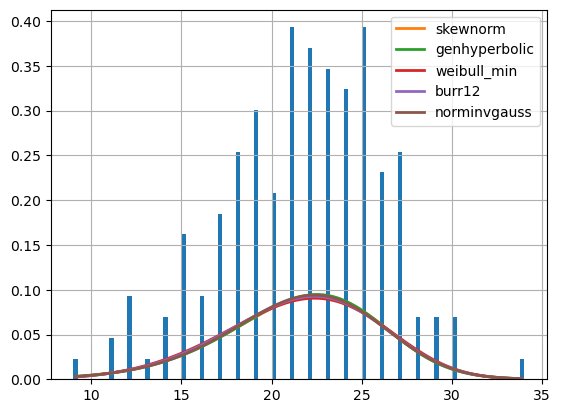

In [39]:
f = Fitter(eagles.O1stD)
f.fit()
f.summary()

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, ar

sumsquare_error         aic         bic  kl_div  ks_statistic  \
dweibull          0.616115  755.600468  765.060343     inf      0.091170   
dgamma            0.616229  757.357144  766.817019     inf      0.098407   
invgauss          0.618757  740.754785  750.214660     inf      0.067423   
alpha             0.618817  741.557252  751.017127     inf      0.064580   
powernorm         0.619032  742.245037  751.704912     inf      0.066582   

           ks_pvalue  
dweibull    0.105878  
dgamma      0.065468  
invgauss    0.393778  
alpha       0.447558  
powernorm   0.409263

C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.p

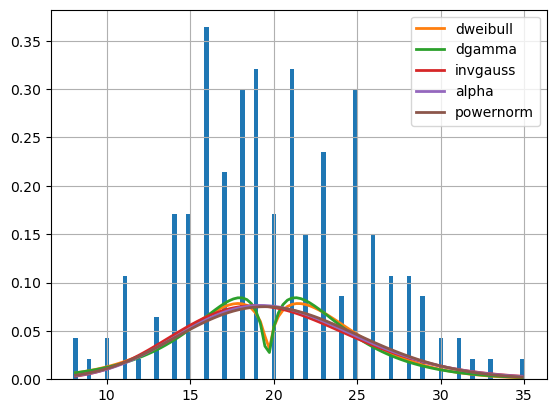

In [40]:
f = Fitter(eagles.D1stD)
f.fit()
f.summary()

C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.p

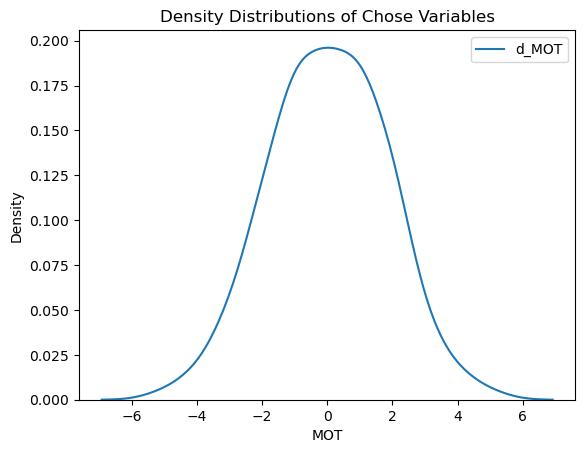

In [41]:
# We will be using MOV, MOT, EOffense, EDefense, ESpTms, DRushY,ORushY, O1stD, D1stD
d_MOT = sns.kdeplot(eagles.MOT)
plt.legend(['d_MOT'])
plt.title('Density Distributions of Chose Variables')
plt.show()


In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(eagles.ORushY, stat = "density")
sns.kdeplot(eagles.ORushY, color = "red")

In [43]:
pd.set_option('display.max_columns', 26)
pd.set_option('display.max_rows', 8)
eagles.describe()

Unnamed: 0  Observations         Year     TmScore    OppScore  \
count  173.000000    173.000000   173.000000  173.000000  173.000000   
mean    86.000000     86.000000  2017.624277   25.433526   22.531792   
std     50.084928     50.084928     2.900058    9.385319   10.502789   
min      0.000000      0.000000  2013.000000    0.000000    0.000000   
25%     43.000000     43.000000  2015.000000   20.000000   16.000000   
50%     86.000000     86.000000  2018.000000   24.000000   22.000000   
75%    129.000000    129.000000  2020.000000   32.000000   27.000000   
max    172.000000    172.000000  2022.000000   54.000000   53.000000   

            O1stD      OTotYd      OPassY      ORushY         OTO       D1stD  \
count  173.000000  173.000000  173.000000  173.000000  173.000000  173.000000   
mean    21.566474  368.005780  239.242775  128.763006    1.427746   20.144509   
std      4.403015   82.135983   75.380423   58.052567    1.249062    5.293363   
min      9.000000  139.000000   82.000000    7.000000    0.000000    8.000000   
25%     19.000000  313.000000  179.000000   94.000000    0.000000   16.000000   
50%     22.000000  373.000000  232.000000  118.000000    1.000000   20.000000   
75%     25.000000  428.000000  298.000000  156.000000    2.000000   24.000000   
max     34.000000  542.000000  462.000000  363.000000    5.000000   35.000000   

           DTotYd      DPassY      DRushY         DTO    EOffense    EDefense  \
count  173.000000  173.000000  173.000000  173.000000  173.000000  173.000000   
mean   350.965318  243.445087  107.520231    1.456647    4.801965   -1.686474   
std     93.325630   82.640041   46.532758    1.183523   11.139833   13.221157   
min     89.000000   61.000000    6.000000    0.000000  -20.770000  -35.640000   
25%    287.000000  182.000000   74.000000    1.000000   -2.130000  -10.900000   
50%    349.000000  239.000000  101.000000    1.000000    4.670000   -0.570000   
75%    412.000000  297.000000  134.000000    2.000000   12.670000    7.260000   
max    613.000000  500.000000  283.000000    5.000000   29.780000   35.650000   

           ESpTms         Win  Home_Games         MOV         MOT  
count  173.000000  173.000000  173.000000  173.000000  173.000000  
mean    -0.267283    0.566474    0.485549    2.901734    0.028902  
std      4.731179    0.497000    0.501242   14.700366    1.789594  
min    -15.050000    0.000000    0.000000  -41.000000   -5.000000  
25%     -2.580000    0.000000    0.000000   -6.000000   -1.000000  
50%     -0.320000    1.000000    0.000000    3.000000    0.000000  
75%      3.220000    1.000000    1.000000   11.000000    1.000000  
max     11.550000    1.000000    1.000000   43.000000    5.000000

'''f = Fitter(eagles.MOV)
f.fit()
f.summary()

a = Fitter(eagles.MOT)
a.fit()
a.summary()

b = Fitter(eagles.O1stD)
b.fit()
b.summary()

c = Fitter(eagles.D1stD)
c.fit()
c.summary()

d = Fitter(eagles.ORushY)
d.fit()
d.summary()

e = Fitter(eagles.DRushY)
e.fit()
e.summary()
'''''''

(d) Identify if there are any non-linearities within your variables. What transformations should you perform to make them linear? What would happen if you included nonlinear variables in your regression models without transforming them first?

0.49829613545987844


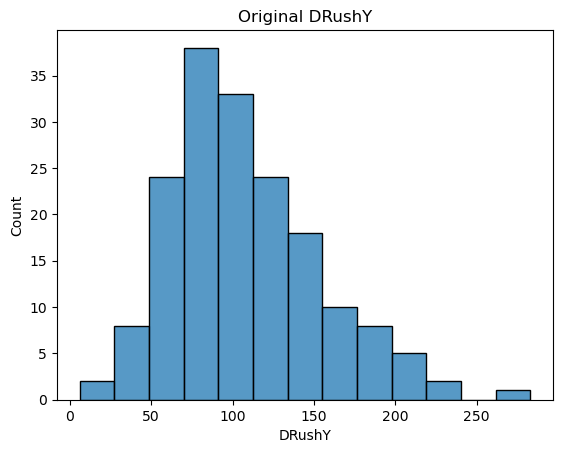

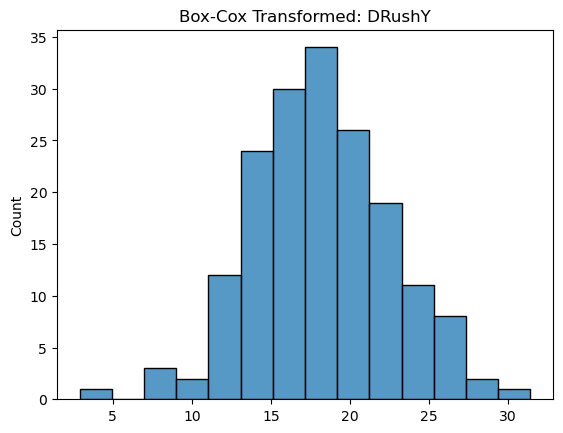

0.4559889588939842


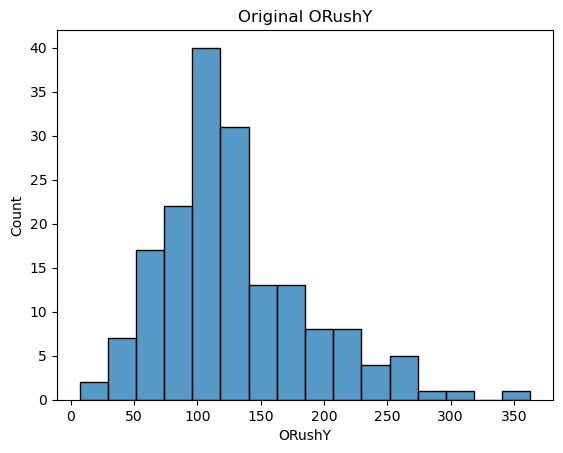

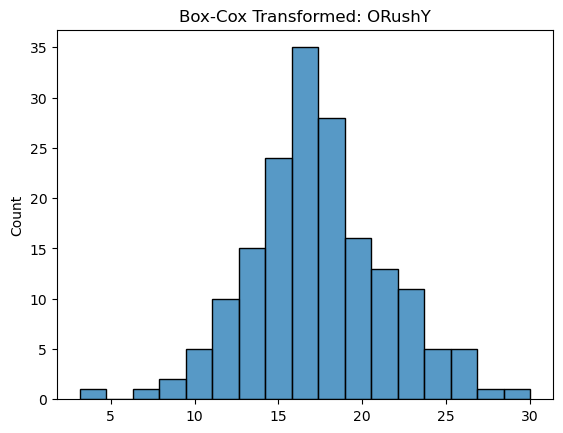

In [44]:
# The variables selected do not appear to show any non-linearities
import scipy


bc_DRY,lambda_DRY = scipy.stats.boxcox(eagles["DRushY"])
print(lambda_DRY)

sns.histplot(eagles["DRushY"])
plt.title("Original DRushY")
plt.show()

sns.histplot(bc_DRY)
plt.title("Box-Cox Transformed: DRushY")
plt.show()

bc_ORY,lambda_ORY = scipy.stats.boxcox(eagles["ORushY"])
print(lambda_ORY)

sns.histplot(eagles["ORushY"])
plt.title("Original ORushY")
plt.show()

sns.histplot(bc_ORY)
plt.title("Box-Cox Transformed: ORushY")
plt.show()


In [45]:
eagles['BCORY']=bc_ORY
eagles['BCDRY']=bc_DRY
r_vars=eagles[['MOT','MOV','O1stD','D1stD','BCORY','BCDRY','Home_Games']]

C:\Users\12282\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\12282\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


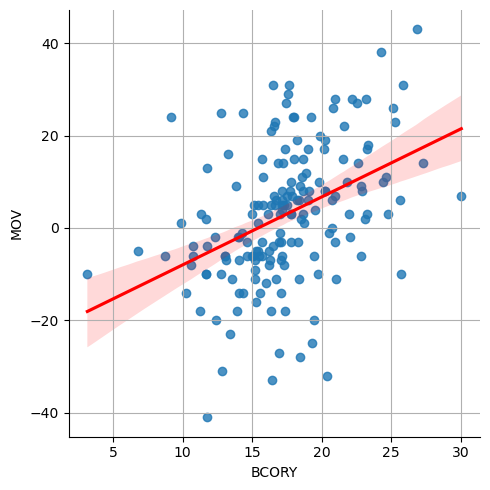

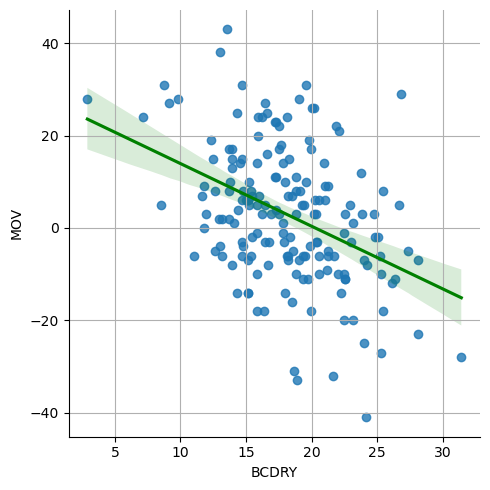

In [46]:
# Graphical Represenation of the transformed variables
sns.lmplot(data=eagles, x='BCORY', y='MOV', line_kws={'color':'red'}, lowess=False, height=5, aspect=1)
plt.grid()
sns.lmplot(data=eagles, x='BCDRY', y='MOV', line_kws={'color':'green'}, lowess=False, height=5, aspect=1)
plt.grid()

In [ ]:
r_vars=eagles[['MOT','MOV','O1stD','D1stD','BCORY','BCDRY','Home_Games']]
# Pair Plot
# specify the column to include or exclude
sns.pairplot(r_vars, kind='reg')

C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.p

C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\12282\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.p

(e) Comment on any outliers and/or unusual features of your variables.

In [ ]:
# Outliers
sns.lmplot(data = eagles, x = 'MOT', y = 'MOV')
plt.title("MOT Regressed")


sns.lmplot(data = eagles, x = 'DRushY', y = 'MOV')
plt.title("DRushY Regressed")


sns.lmplot(data = eagles, x = 'ORushY', y = 'MOV')
plt.title("ORushY Regressed")

sns.lmplot(data = eagles, x = 'O1stD', y = 'MOV')
plt.title("O1stD Regressed")


sns.lmplot(data = eagles, x = 'D1stD', y = 'MOV')
plt.title("D1st Regressed")


sns.lmplot(data = eagles, x = 'Home_Games', y = 'MOV')
plt.title("Home_Games Regressed")

plt.show()


(f) If you have any NAs, impute them using any of the methods discussed in class but make sure to justify your choice.

The above plots show several outliers.

In [ ]:
# Boxplots to show outliers
plt.boxplot(eagles.MOV)
plt.grid

The above box plot clearly indicates the presence of outliers.

In [ ]:
# The variables used in the initial analysis do not have missing values

# 2. Variable Selection:

(a) Using the Boruta Algorithm identify the top 2 predictors

In [ ]:
from BorutaShap import BorutaShap

from sklearn.ensemble import RandomForestRegressor

In [ ]:
boruta_data = eagles[[ 'MOV','O1stD','BCORY','D1stD','BCDRY','MOT', 'Home_Games']].copy()

In [ ]:
x = boruta_data.iloc[:,1:]

In [ ]:
x = boruta_data.iloc[:, 1:]
y = boruta_data['MOV']
Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
Feature_Selector.fit(X=x, y=y, n_trials=100, random_state=0)
Feature_Selector.plot(which_features='all')

In [ ]:
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 173)
Feature_Selector.Subset()

In [ ]:
# Ranking Boruta results
Boruta.ranking_
# for better visualization use of the boruta ranking
featureRanks = list(zip(xCols, boruta.ranking_))
sorted(featureRanks, key=lambda x: x[1])

(b) Using Mallows Cp identify the top 2 predictors

In [ ]:
pip install RegscorePy

In [ ]:

from RegscorePy import mallow

In [ ]:
model = smf.ols(formula='(MOV) ~ MOT + O1stD + BCORY + D1stD + BCDRY', data=eagles)
results = model.fit(cov_type='HC1')
results.summary()

In [ ]:
import itertools

model = smf.ols(formula='MOV ~ MOT + O1stD + BCORY + D1stD + BCDRY', data=eagles)
results = model.fit()
y = eagles['MOV']
y_pred=results.fittedvalues


storage_cp = pd.DataFrame(columns = ["Variables", "CP"])
k = 8

for L in range(1, len(r_vars.columns[0:]) + 1):
    for subset in itertools.combinations(r_vars.columns[0:], L):

        formula1 = 'MOV~'+'+'.join(subset)

        results = smf.ols(formula=formula1, data = eagles).fit()
        y_sub = results.fittedvalues
        p = len(subset)+1

        cp = mallow.mallow(y, y_pred,y_sub, k, p)

        storage_cp = storage_cp._append({'Variables': subset, 'CP': cp}, ignore_index = True)

In [ ]:
pd.set_option('display.max_columns', 2)
pd.set_option('display.max_rows', 127)
storage_cp.sort_values(by = "CP")

In [ ]:
# The top two variables are MOT and D1stD based on the Mallow CP report

3. Model Building: Explore several competing OLS models (based on part 2) and decide on one model only (with just one predictor). You will need to explain in detail how you arrived at your preferred model. Discuss the economic significance of your parameters, and overall findings. Make sure you discuss your main conclusions and recommendations. At a minimum. you need to include the following checks:

In [ ]:
# Specify the Model
ols_mod = smf.ols(formula='MOV ~ MOT', data = eagles)

# Fit the Model
ols_fit = ols_mod.fit()
# Type: dir(ols_fit) to look at other accessible attributes

# Look at the Model Fit Summary
print(ols_fit.summary())


In [ ]:
pip install simple_colors

In [ ]:
# Evaluating the model
import statsmodels.stats.api as sms
from simple_colors import *

# Linearity: Harvey-Collier --> Ho: model is linear
name = ["t-stat", "p-value"]
test = sms.linear_harvey_collier(ols_fit)
print(blue("Linearity Test Results:",['bold']))
print(list(zip(name, test)))
print("\n")

# Normaility of the Residuals: Jarque-Bera --> Residuals ~ N(0,1)
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(ols_fit.resid)
print(blue("JB Results:",['bold']))
print(list(zip(name, test)))
print("\n")

# Heteroskedasticity: Breush-Pagan --> Ho: var = constant
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(ols_fit.resid, ols_fit.model.exog)
print(blue("BP Results:",['bold']))
print(list(zip(name, test)))

In [ ]:
# Test for normality of residuals - JB test
stats.jarque_bera(ols_fit.resid)

Based on the output for the test for linearity, since the p-value is > alpha 0.05 we fail to reject the hull and conclude that the model is linear

As for normality test, the JB Results show that the errors are normally distributed because the p-value is > alpha 0.05 even though the JB score = 1.8 which is > 1 (kurtosis is 3.2..., skewness is 0.2)

For Heteroskedasticity

In [ ]:
# Diagnostic plots of ols fit
figD = sm.graphics.plot_regress_exog(ols_fit, "MOT")
figD.set_figheight(10)
figD.set_figwidth(8)
plt.show()

In [ ]:
model = smf.ols(formula='(MOV) ~ MOT + O1stD + BCORY + D1stD + BCDRY + Home_Games', data=eagles)
results = model.fit()
y = (eagles['MOV'])
y_pred=results.fittedvalues

# Using subset size =1
mr_sub = smf.ols(formula='(MOV) ~ MOT', data=eagles)
mr_sub_fit = mr_sub.fit()
y_sub=mr_sub_fit.fittedvalues

k = 8 # number of parameters in orginal model (includes y-intercept)
p = 3 # number of parameters in the subset model (includes y-intercept)

mallow.mallow(y, y_pred,y_sub, k, p)

In [ ]:
model = smf.ols(formula='(MOV) ~ MOT + O1stD + BCORY + D1stD + BCDRY + Home_Games', data=eagles)
results = model.fit()
y = (eagles['MOV'])
y_pred=results.fittedvalues

# Using subset size =1
mr_sub = smf.ols(formula='(MOV) ~ D1stD', data=eagles)
mr_sub_fit = mr_sub.fit()
y_sub=mr_sub_fit.fittedvalues

k = 8 # number of parameters in orginal model (includes y-intercept)
p = 3 # number of parameters in the subset model (includes y-intercept)

mallow.mallow(y, y_pred,y_sub, k, p)

Using the results of the mellow CP the results showed that the best model with one predictor was MOV ~ MOT, followed by MOV~ D1stD. We tested the two models and found the first one had the lowest result, so we chose that as the best model with one predictor.


Look at Cook’s distance Plot, Residuals Plot

In [ ]:
Turnover = smf.ols(formula='MOV ~ MOT', data=eagles)
T_results = Turnover.fit(cov_type='HC1')
print(T_results.summary())
T_results.resid.mean()

In [ ]:
sns.residplot(x='MOV', y='MOT', data=eagles,
              lowess=True, line_kws={'color':'red', 'lw':2, 'alpha':0.6})
plt.xlabel('Fitted Values')
plt.title('Residuals Plot')
plt.show

In [ ]:
student_resid=T_results.get_influence().resid_studentized
df=len(student_resid)-4
t_dist=stats.t(df)
sm.qqplot(student_resid, line='45', dist=t_dist)
plt.grid()

In [ ]:
leverage=T_results.get_influence().hat_matrix_diag

plt.figure(figsize=(12,6))
plt.scatter(eagles.index,leverage)
plt.axhline(0,color='red')
plt.vlines(x=eagles.index, ymin=0,ymax=leverage)
plt.xlabel('Index')
plt.ylabel('Leverage')
plt.title('Diagnostic plot')
plt.show()

In [ ]:
cooks_distance=T_results.get_influence().cooks_distance

plt.figure(figsize=(12,6))
plt.scatter(eagles.index,cooks_distance[0])
plt.axhline(0,color='red')
plt.vlines(x=eagles.index, ymin=0,ymax=cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title('Diagnostic plot')
plt.show()

In [ ]:
fig, ax= plt.subplots(figsize=(10,5))
fig=sm.graphics.influence_plot(T_results, ax=ax, criterion='cooks')

Evaluate transformations of variables

Evaluate the robustness of your coefficient estimates by bootstrapping your model. Provide a histogram of the bootstrapped estimates (including R), and comment on the findings. In particular how do these estimates compare against your LS estimates?

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
coefs=pd.DataFrame(columns=['B0,B1'])

for i in range(1000):
  sample = eagles.sample(eagles.shape[0], replace=True)
  results=smf.ols('MOV~MOT', sample).fit()
  b0,b1=results.params
  coefs=coefs._append({'B0':b0, 'B1':b1}, ignore_index=True)

bo_u, b1_u =coefs.quantile(0.975)
bo_u, b1_u =coefs.quantile(0.025)

In [ ]:
from scipy.stats import bootstrap

def reg_boot_b1(x,y):

    x = x.reshape((len(x),1))
    y = y.reshape((len(x),1))
    reg = LinearRegression().fit(x,y)

    return reg.coef_[0][0]

def reg_boot_intercept(x,y):

    x = x.reshape((len(x),1))
    y = y.reshape((len(x),1))
    reg = LinearRegression().fit(x,y)

    return reg.intercept_[0]

X = eagles.MOT
Y = eagles.MOV
res = bootstrap((X,Y), reg_boot_b1, confidence_level=0.95, vectorized=False, method='BCa',
              paired=True)
print(res.confidence_interval)

Examining the Bootstrap estimates

#
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm


# Load the data:
***********????

# resample with replacement each row
boot_slopes = []
boot_interc = []
boot_adjR2 = []
n_boots = 100
n_points = df.shape[0]
plt.figure()
for _ in range(n_boots):
 # sample the rows, same size, with replacement
    sample_df = eagles.sample(n=n_points, replace=True)
 # fit a linear regression
    ols_model_temp = sm.ols(formula = 'MOV ~ MOT', data=sample_df)
    results_temp = ols_model_temp.fit()

 # append coefficients
    boot_interc.append(results_temp.params[0])
    boot_slopes.append(results_temp.params[1])
    boot_adjR2.append(results_temp.rsquared_adj)

 # plot a greyed out line
    y_pred_temp = ols_model_temp.fit().predict(sample_df['MOT'])
    plt.plot(sample_df['MOV'], y_pred_temp, color='grey', alpha=0.2)
# add data points
y_pred = ols_model_temp.fit().predict(df['MOV'])
plt.scatter(df['MOV'], df['MOT'])
plt.plot(df['MOV'], y_pred, linewidth=2,color = 'red')
plt.grid(True)
plt.xlabel('MOV')
plt.ylabel('MOT')
plt.title('MOT vs MOV')
plt.show()

# This code should show a graph similar to the one in 430 reg_example 1 py.

import seaborn as sns
sns.displot(boot_slopes, alpha = 0.25)
plt.axvline(x=0.0307,color='red', linestyle='--')
plt.title('Bootstrap Estimates: Slope')
plt.show()

# The vertical red line = LS estimate

Use cross-validation to evaluate your model’s performance

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

x = eagles[['MOV']]
y = eagles[['MOT']]
# Perform an OLS fit using all the data
regr = LinearRegression()
model = regr.fit(x,y)
regr.coef_
regr.intercept_

# Split the data into train  (70%)/test(30%) samples:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Train the model:
regr = LinearRegression()
regr.fit(x_train, y_train)

# Make predictions based on the test sample
y_pred = regr.predict(x_test)

# Evaluate Performance

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Perform a 5-fold CV
# Use MSE as the scoring function (there are other options as shown here:
# https://scikit-learn.org/stable/modules/model_evaluation.html

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, x, y, cv=5, scoring='neg_root_mean_squared_error')
print('5-Fold CV RMSE Scores:', scores)

Write a conclusion about the findings here: Root Mean Squared Error (RMSE), which measures the average prediction error made by the model in predicting the outcome for an observation. That is, the average difference between the observed known outcome values and the values predicted by the model. The lower the RMSE, the better the model


Bootstrapping (include the graphs).

Cullen and Frey Graphs (choose which method of display we want, using fitter or not)

Evaluate Transformation of Variables,
Explanation for each code chunk
Add plots for outliers as well (do we need to use the method with R?)


Getting Mallows CP(not showing a graph, could only work in R) to work inside an R environment